<div class="clearfix" style="padding: 10px; padding-left: 0px">
    <img src="http://corporate.renault-trucks.com/media/image/CP-jpg/logo_ecole_centrale_lyon.jpg" width="450px" style="display: inline-block; margin-top: 5px;"/>
    <br/>
    <br/>
    <h1 style="color:rgb(150,0,0)">  Séance 1 : Parsing des données et premier affichage </h1>
</div>

<h1 style="color:rgb(150,0,0)"> I. Présentation de la séance</h1>

<h2 style="color:rgb(0,0,150)"> A. Objectifs</h2>

Cette séance sera consacrée au chargement des données de Google TakeOut et à une première visualisation.

Nous nous sommes en particulier inspiré du repository GitHub 
[suivant](https://gist.github.com/chrisalbon/0a55b7b5ef6584e672cd)  

Pour l'affichage des données sur une carte; nous ne visons pas une correspondance parfaite entre les points relevés et le fond de carte. Il s'agit plutôt de travailler sur une représentation qui nous permette de comprendre à quoi correspondent les différents points.

<h2 style="color:rgb(0,0,150)"> B. Analyse technique</h2>
<p>
Les données Google TakeOut sont des fichiers JSON extremement long. Pour les exploiter, nous allons utiliser les objets <b> panda.dataFrame </b> .
<br/> Pour commencer, nous allons travailler sur les données de géolocalisation s'étalant sur une année d'une personne de notre groupe.
<br/>
</p>

<h1 style="color:rgb(150,0,0)">  II. Code  </h1>

<h2 style="color:rgb(0,0,150)"> A. Extraction des données JSON</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Loading data
file = "data/anonymous_2015.json"
raw = pd.io.json.read_json(file)

In [3]:
# Expand the locations column into a dataframe
# This lets us move down one level in the json structure
df = raw['locations'].apply(pd.Series)

### Visulation des données extraites du fichiers json. 

In [4]:
df.head()

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity
0,103,NaN,NaN,NaN,377611139,-1224707537,1468723321167,NaN
1,12,NaN,36.0,NaN,377611139,-1224707537,1468723302999,0.0
2,12,NaN,49.0,NaN,377611139,-1224707537,1468723287999,0.0
3,20,"[{'timestampMs': '1468723265584', 'activity': ...",NaN,NaN,377610871,-1224706561,1468723272489,NaN
4,12,NaN,16.0,NaN,377613962,-1224707777,1468723251000,0.0


### Transformation des lattitudes et longitudes au format standart

In [5]:
# Create a list from the latitude and the longitude column, multiplied by -E7
df['latitude'] = df['latitudeE7'] * 0.0000001
df['longitude'] = df['longitudeE7'] * 0.0000001

## B. Premier affichage sur une carte

On affiche dans un premier temps les données sur la France entière, pour cela il faut précsier les latitudes extrèmes du plan sur lequel on souhaite se placer.

In [6]:
 map = Basemap(projection='merc', lat_0=0, lon_0=0,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=-5, llcrnrlat=42,
    urcrnrlon=9, urcrnrlat=51)

In [7]:
x,y = map(df['longitude'].values, df['latitude'].values)

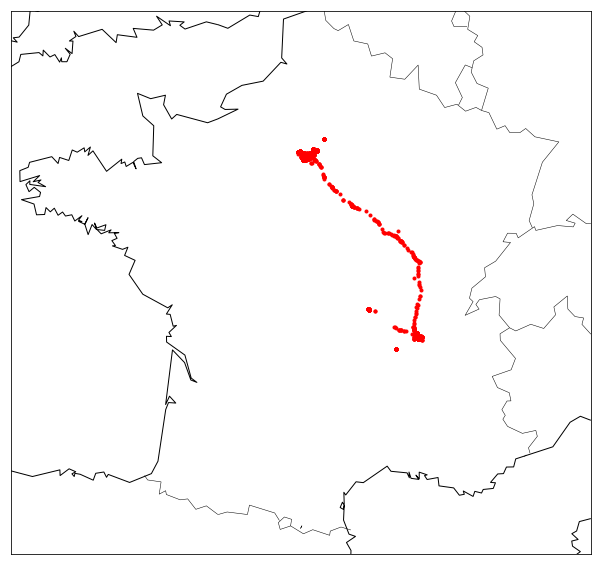

In [8]:
plt.figure(figsize=(20, 10))
map.drawcountries()
map.drawcoastlines()
map.plot(x, y, 'ro', markersize=3)
plt.show()

### Visualisation des données sur la ville de Lyon

In [9]:
lyon_map = Basemap(projection='merc', lat_0=45.759032, lon_0=4.833987,
    resolution = 'h', area_thresh = 1000.0,
    llcrnrlon=3.731840, llcrnrlat=44.847501,
    urcrnrlon=6.373109, urcrnrlat=47.128597)

In [10]:
x,y = lyon_map(df['longitude'].values, df['latitude'].values)

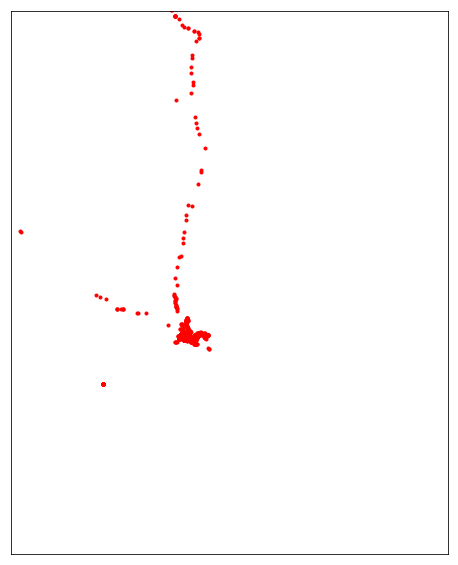

In [11]:
plt.figure(figsize=(20,10))
lyon_map.plot(x, y, 'ro', markersize=3)
plt.show()

<h1 style="color:rgb(150,0,0)">  III. Conclusion</h1>

<h2 style="color:rgb(0,0,150)"> A. Bilan</h2>
<p>
Cette séance, nous sommes parvenus à nos objectifs. Toutefois nous notons que le fond de carte que nous utilisons n'est pas très adapté. Il ne représente que les frontières des pays; il n'est donc d'aucune aide pour représenter les trajets au sein d'une ville. 
</p>

<h2 style="color:rgb(0,0,150)"> B. Travail à faire de la prochaine séance </h2>
<p>
<br/>
Lors de la prochaine séance, nous travaillerons sur :
<ul> 
    <li> Enlever les fonctions 'depricated' </li> 
    <li> Re-travailler sur le fond de carte </li> 
    <li> Organiser nos données pour pouvoir y accéder jour par jour </li>
    <li> Tracer de premiers trajets, ie relier les points de façon cohérente </li>
    <li> Commencer à travailler sur le nettoyage des trajets </li>
</ul> 
</p>